In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1. Read in data

In [51]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
holidays = pd.read_csv('../data/holidays_events.csv')
oil = pd.read_csv('../data/oil.csv')
stores = pd.read_csv('../data/stores.csv')
transactions = pd.read_csv('../data/transactions.csv')

In [3]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [5]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [7]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [9]:
# print the shape of all the dataframes

print(f'train data contains {train.shape[0]} rows and {train.shape[1]} columns')
print(f'test data contains {test.shape[0]} rows and {test.shape[1]} columns')
print(f'oil data contains {oil.shape[0]} rows and {oil.shape[1]} columns')
print(f'holidays data contains {holidays.shape[0]} rows and {holidays.shape[1]} columns')
print(f'stores data contains {stores.shape[0]} rows and {stores.shape[1]} columns')
print(f'transaction data contains {transactions.shape[0]} rows and {transactions.shape[1]} columns')

train data contains 3000888 rows and 6 columns
test data contains 28512 rows and 5 columns
oil data contains 1218 rows and 2 columns
holidays data contains 350 rows and 6 columns
stores data contains 54 rows and 5 columns
transaction data contains 83488 rows and 3 columns


#### 2. Merge oil, stores and transactions data with train and test data

In [52]:
def merge_df(df, oil, stores, transactions):
    """
    Merge data with other informative dataframes.

    Args:
    df: pd.DataFrame
        Main dataframe with which other dataframes should be merged.
    oil: pd.DataFrame 
        Dataframe with daily oil prices.
    stores: pd.DataFrame
        Stores metadata including city, state, type and cluster.
    transactions: pd.DataFrame
        Dataframe with transactions data.

    Returns
    df: pd.DataFrame
        Merged dataframe    

    """
    try:
        df = df.merge(oil, on='date', how='left')
        df = df.merge(stores, on='store_nbr', how='left')
        df = df.merge(transactions, on=['date', 'store_nbr'], how='left')
        return df
    except Exception as e:
        print(f'Error occured during merging dataframes, {str(e)}')


In [53]:
train = merge_df(train, oil, stores, transactions)
test = merge_df(test, oil, stores, transactions)

In [12]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN


In [13]:
test.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,city,state,type,cluster,transactions
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,Quito,Pichincha,D,13,NaN
1,3000889,2017-08-16,1,BABY CARE,0,46.8,Quito,Pichincha,D,13,NaN
2,3000890,2017-08-16,1,BEAUTY,2,46.8,Quito,Pichincha,D,13,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,Quito,Pichincha,D,13,NaN
4,3000892,2017-08-16,1,BOOKS,0,46.8,Quito,Pichincha,D,13,NaN


In [14]:
print(f'train data contains {train.shape[0]} rows and {train.shape[1]} columns')
print(f'test data contains {test.shape[0]} rows and {test.shape[1]} columns')

train data contains 3000888 rows and 12 columns
test data contains 28512 rows and 11 columns


#### 3. Comprehensive summary of the data 

In [15]:
def info_table(df, num_unique_threshold = 50):
    """
    Comprehensive DataFrame Summary Table Generator
    
    For a given dataframe, this function creates a table with column names, data types, count, mean, 
    standard deviation, minimum, 25%, 50%, 75% quantiles, maximum, number of unique values, 
    unique values list, number of null values and 
    percentage of null values.

    Args:
    df: pd.DataFrame
        Input dataframe.
    num_unique_threshold: int, optional (default = 50)  
        Threshold for listing unique values.

    Returns:
    df_info: pd.DataFrame
        A summary table with detailed statistics for each column.

    Raises:
    Exception
        If a error occurs while computing the details.    

    """
    try:
        df_info = pd.DataFrame({
            'column': df.columns,
            'dtype': df.dtypes.values,
            'count': df.count().values,
            'mean': df.apply(lambda col: col.mean() if pd.api.types.is_numeric_dtype(col) else np.nan),
            'std': df.apply(lambda col: round(col.std(),2) if pd.api.types.is_numeric_dtype(col) else np.nan),
            'min': df.apply(lambda col: col.min() if pd.api.types.is_numeric_dtype(col) else np.nan),
            '25%': df.apply(lambda col: col.quantile(0.25) if pd.api.types.is_numeric_dtype(col) else np.nan),
            '50%': df.apply(lambda col: col.quantile(0.5) if pd.api.types.is_numeric_dtype(col) else np.nan),
            '75%': df.apply(lambda col: col.quantile(0.75) if pd.api.types.is_numeric_dtype(col) else np.nan),
            'max': df.apply(lambda col: col.max() if pd.api.types.is_numeric_dtype(col) else np.nan),
            'nunique': df.nunique().values,
            'unique_values': df.apply(lambda col : col.unique() if col.nunique() < num_unique_threshold else ''),
            'num_null_values': df.isna().sum().values,
            'null_perct': (df.isna().sum().values/df.shape[0]*100).round(2)

        })

        return df_info
    
    except Exception as e:
        print(f'Error occurred while computing information for the dataframe: {str(e)}')

In [16]:
summary_table = info_table(train, 50)

In [17]:
summary_table

,column,dtype,count,mean,std,min,25%,50%,75%,max,nunique,unique_values,num_null_values,null_perct
id,id,int64,3000888,1.500444e+06,866281.89,0.00,750221.75,1500443.50,2.250665e+06,3000887.00,3000888,,0,0.00
date,date,object,3000888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1684,,0,0.00
store_nbr,store_nbr,int64,3000888,2.750000e+01,15.59,1.00,14.00,27.50,4.100000e+01,54.00,54,,0,0.00
family,family,object,3000888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO...",0,0.00
sales,sales,float64,3000888,3.577757e+02,1102.00,0.00,0.00,11.00,1.958473e+02,124717.00,379610,,0,0.00
onpromotion,onpromotion,int64,3000888,2.602770e+00,12.22,0.00,0.00,0.00,0.000000e+00,741.00,362,,0,0.00
dcoilwtico,dcoilwtico,float64,2072466,6.792559e+01,25.67,26.19,46.38,53.33,9.580000e+01,110.62,994,,928422,30.94
city,city,object,3000888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,"[Quito, Cayambe, Latacunga, Riobamba, Ibarra, ...",0,0.00
state,state,object,3000888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,"[Pichincha, Cotopaxi, Chimborazo, Imbabura, Sa...",0,0.00
type,type,object,3000888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,"[D, C, B, E, A]",0,0.00


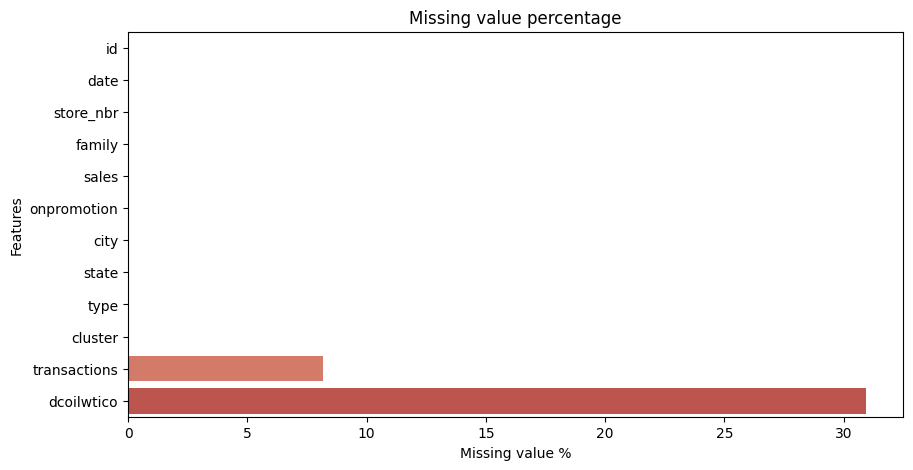

In [18]:
# plot missing data percentage

summary_table.sort_values(by=['null_perct'], ascending=True, inplace=True)

plt.figure(figsize=(10,5))
sns.barplot(y=summary_table['column'], x=summary_table['null_perct'], palette='coolwarm')
plt.title('Missing value percentage')
plt.xlabel('Missing value %')
plt.ylabel('Features')
plt.show()



Except for two features, there are no missing values. Of these, 'transactions' has less than 10% missing values, 'dcoilwtico' has around 30%.

In [19]:
train['date'] = pd.to_datetime(train['date'])

In [20]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN


#### 4. Data visualization

SALES OVER TIME

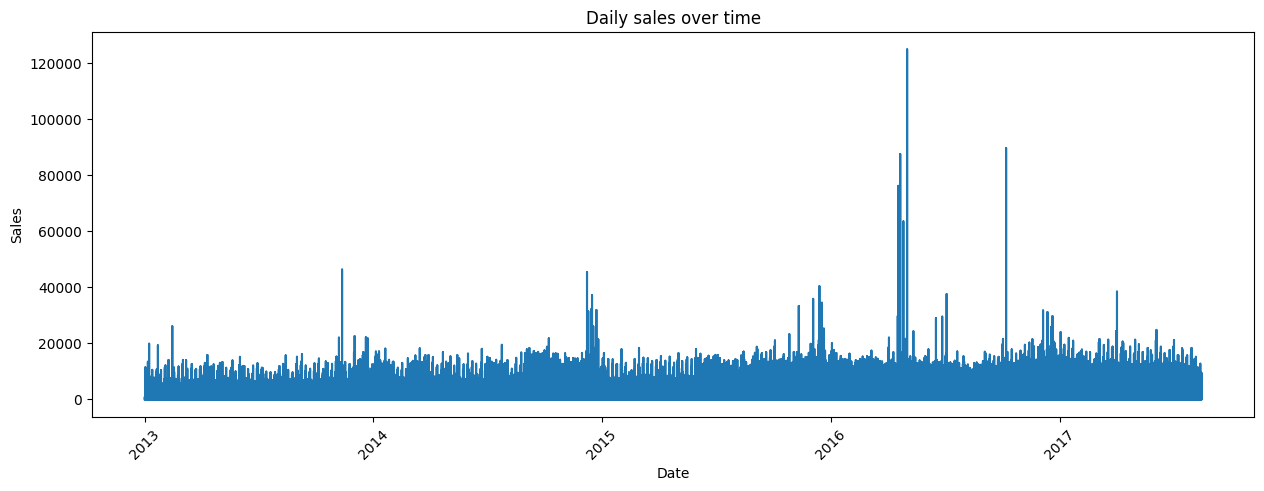

In [21]:
# visualize sales over time

# aggregate sales by date
daily_sales = train.groupby('date')['sales'].sum().reset_index()

#plot
plt.figure(figsize=(15,5))
plt.plot( train['date'], train['sales'])

plt.title('Daily sales over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

There are some significant spikes in the sales between 2016 and 2017. This might be due to the earthquake on April 16, 2016. Let's take a closer look at this periods.

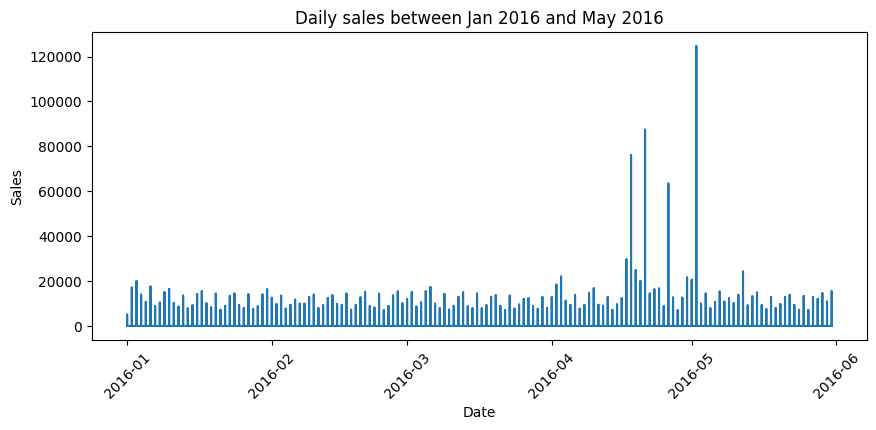

In [22]:
# extract the sales data for 2016
sub = train[(train['date']>='2016-01-01') & (train['date']<='2016-05-31')]

#plot
plt.figure(figsize=(10,4))
plt.plot( sub['date'], sub['sales'])

plt.title('Daily sales between Jan 2016 and May 2016')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

The increase in sales we observe between April 2016 and May 2016 probably corresponds to the earthquake at Ecuador. Additionally, since the wages in the public sector are paid every two weeks on the 15th and on the last day of the month, this can explain the spike in sales on the last day and the first day of the month following the earthquake. 

TOTAL SALES FOR PER STORE PER DAY

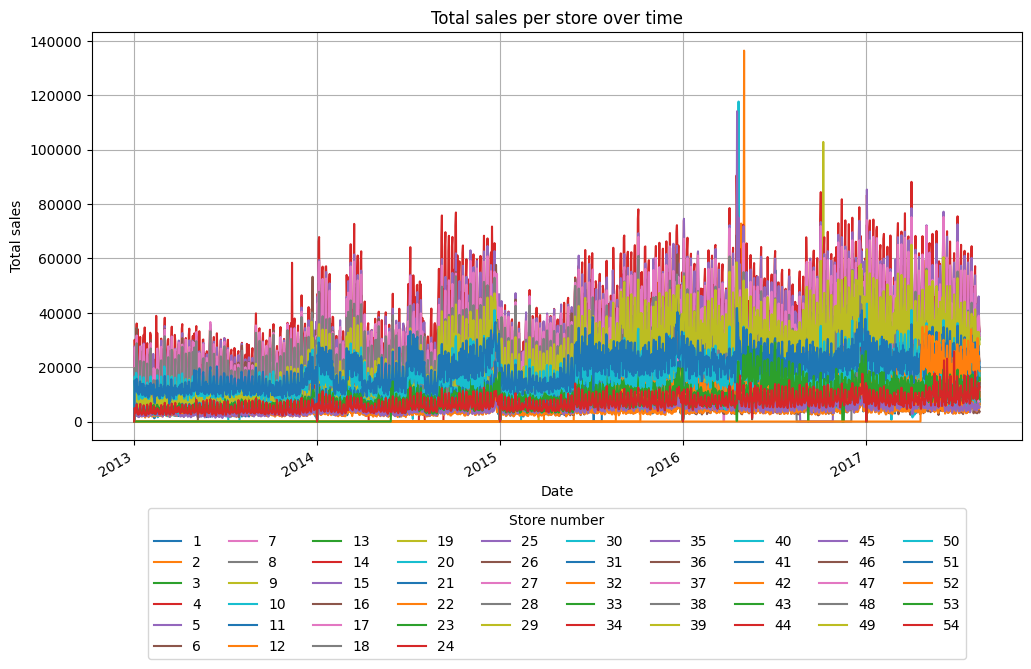

In [23]:
# aggregate the data to get total sales per store per day
sales_per_store = train.groupby(['date', 'store_nbr'])['sales'].sum().unstack()

# plot the sales
plt.figure(figsize=(12,6))
sales_per_store.plot(ax=plt.gca()) # plotting all stores on one plot
plt.title('Total sales per store over time')
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.legend(title='Store number', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=10)
plt.grid(True)
plt.show()

TOTAL SALES WITH RESPECT TO PRODUCT FAMILY OVER TIME

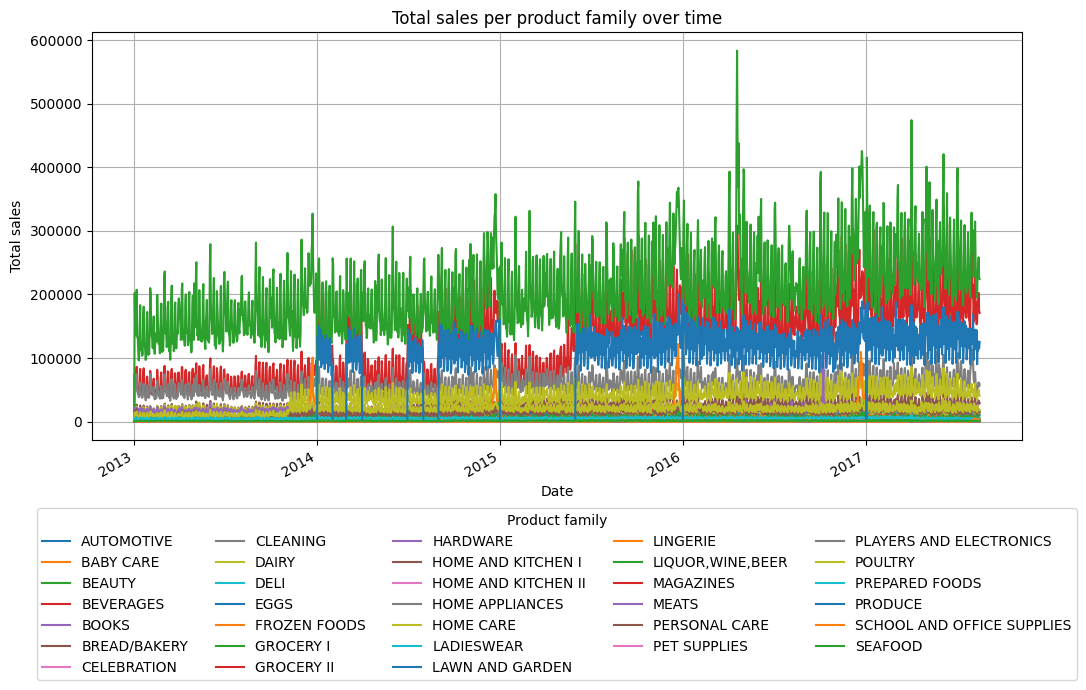

In [24]:
# aggregate the data to get total sales for each product family per day
sales_per_family = train.groupby(['date', 'family'])['sales'].sum().unstack()

# plot the sales
plt.figure(figsize=(12,6))
sales_per_family.plot(ax=plt.gca()) # plotting all stores on one plot
plt.title('Total sales per product family over time')
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.legend(title='Product family', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.grid(True)
plt.show()

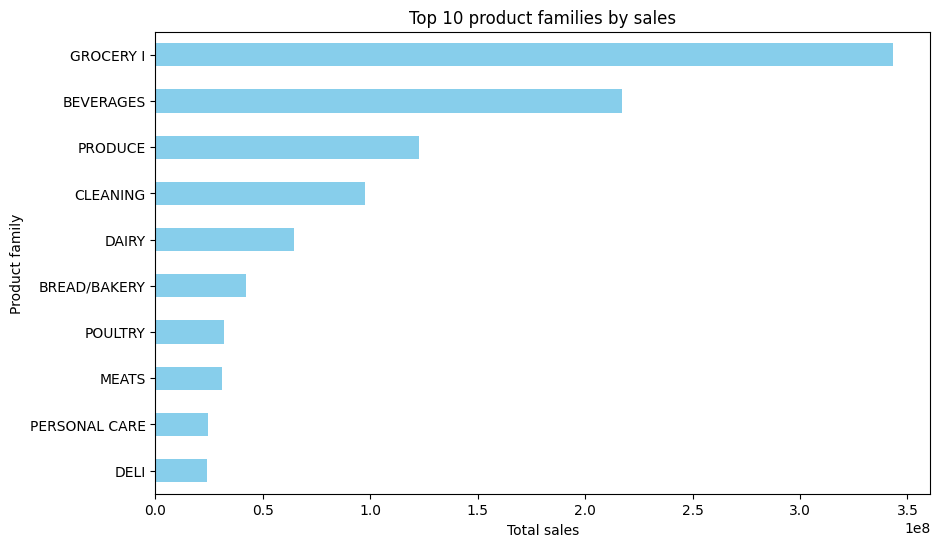

In [25]:
# selecte top 10 families based on the sales
top_10_families = train.groupby('family')['sales'].sum().sort_values(ascending=False).head(10)

# plot
plt.figure(figsize=(10,6))
top_10_families.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 product families by sales')
plt.xlabel('Total sales')
plt.ylabel('Product family')
plt.show()

The highest sales can be seen for GROCERY I  and BEVERAGES.

TOTAL SALES WITH REPECT TO CITIES OVER TIME

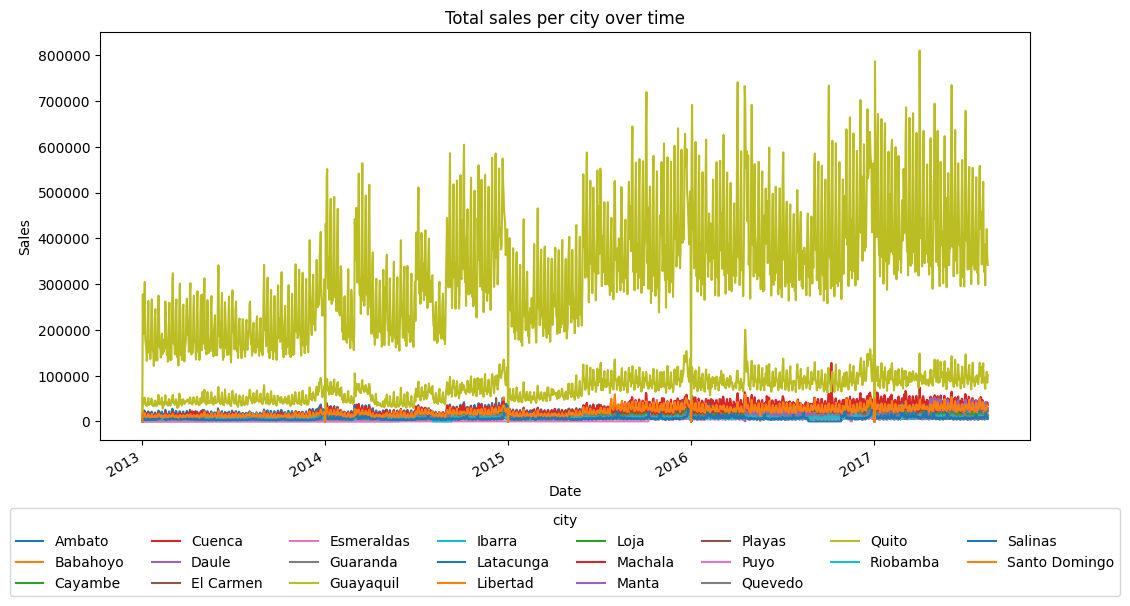

In [26]:
sales_per_city = train.groupby(['date', 'city'])['sales'].sum().unstack()

# plot
plt.figure(figsize=(12,6))
sales_per_city.plot(ax=plt.gca())
plt.title('Total sales per city over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='city', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.show()

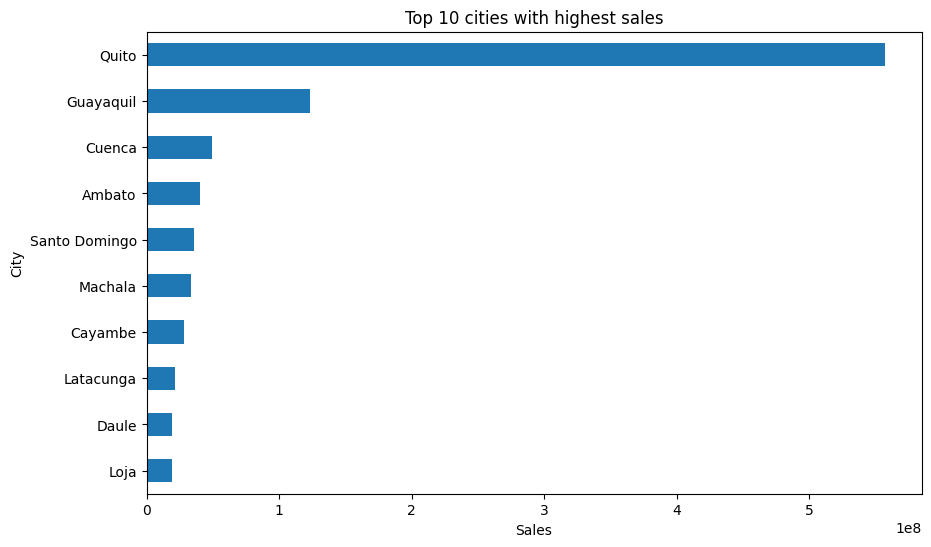

In [27]:
# select top 10 cities with highest sales
top_10_cities = train.groupby('city')['sales'].sum().sort_values(ascending=False).head(10)

#plot
plt.figure(figsize=(10,6))
top_10_cities.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 cities with highest sales')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()

TOTAL SALES WITH RESPECT TO STATES OVER TIME

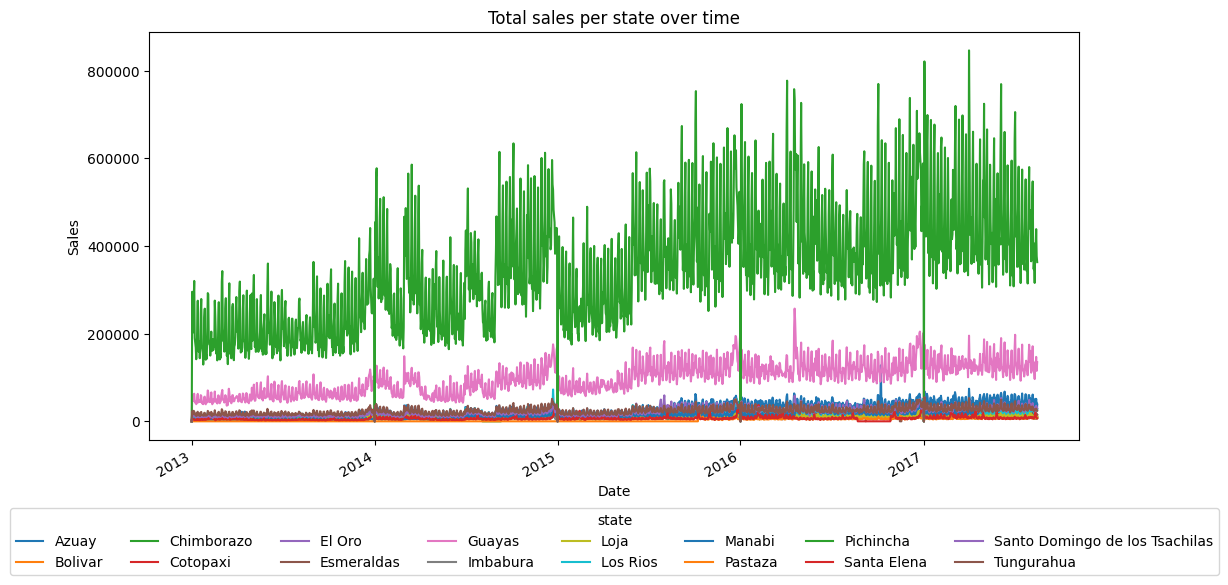

In [28]:
sales_per_state = train.groupby(['date','state'])['sales'].sum().unstack()

# plot
plt.figure(figsize=(12,6))
sales_per_state.plot(ax=plt.gca())
plt.title('Total sales per state over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='state', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.show()

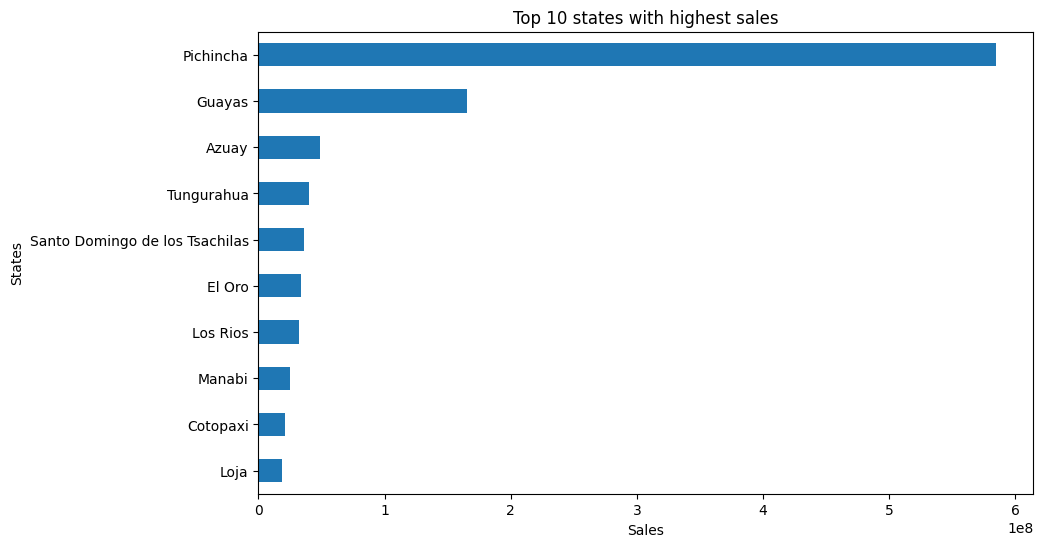

In [29]:
# select top 10 states with highest sales
top_10_states = train.groupby('state')['sales'].sum().sort_values(ascending=False).head(10)

#plot
plt.figure(figsize=(10,6))
top_10_states.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 states with highest sales')
plt.xlabel('Sales')
plt.ylabel('States')
plt.show()

TOTAL SALES WITH RESPECT TO CLUSTER (GROUPING OF SIMILAR STORES) OVER TIME

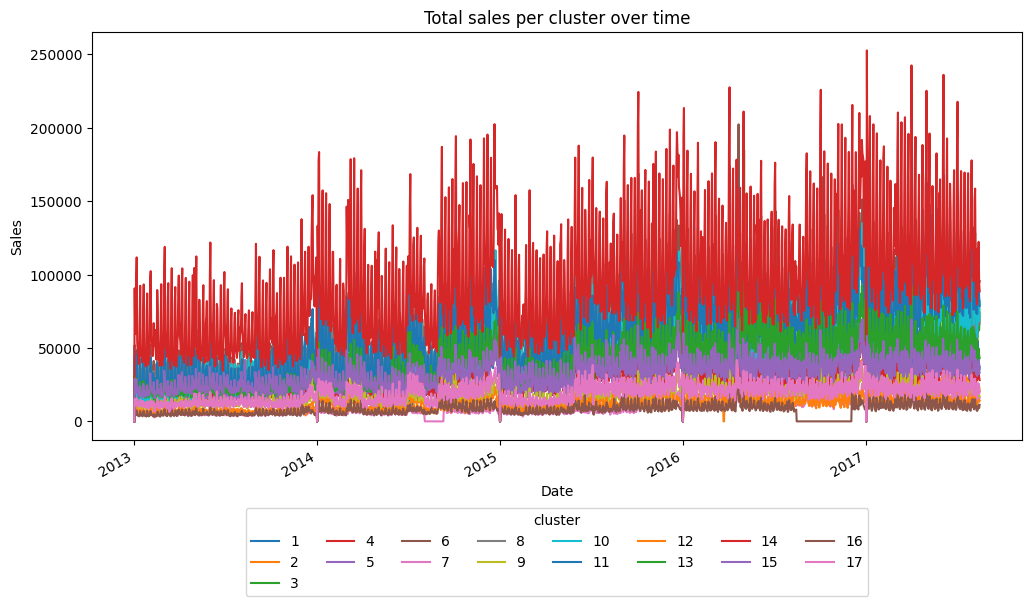

In [30]:
sales_per_cluster = train.groupby(['date','cluster'])['sales'].sum().unstack()

# plot
plt.figure(figsize=(12,6))
sales_per_cluster.plot(ax=plt.gca())
plt.title('Total sales per cluster over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='cluster', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.show()

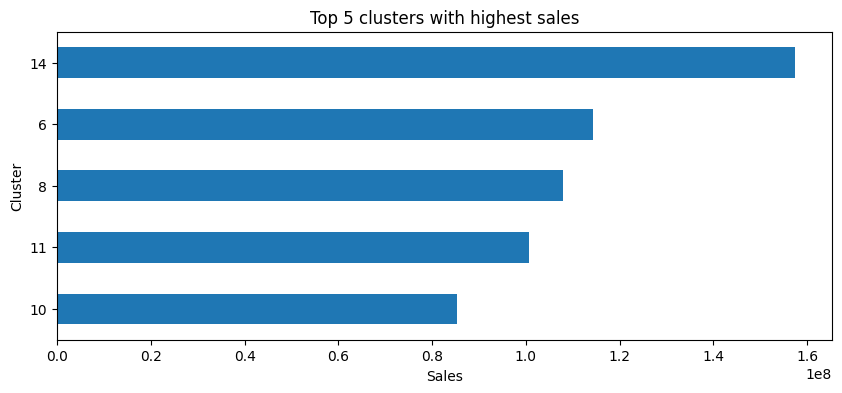

In [31]:
# select top 5 clusters with highest sales
top_5_cluster = train.groupby('cluster')['sales'].sum().sort_values(ascending=False).head(5)

#plot
plt.figure(figsize=(10,4))
top_5_cluster.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 5 clusters with highest sales')
plt.xlabel('Sales')
plt.ylabel('Cluster')
plt.show()

Let's now incorporate holidays data from holiday_events into the training data.

In [32]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [40]:
holidays['date'] = pd.to_datetime(holidays['date'])

In [54]:
# add a holiday column to 'train' df and fill the values as zero
train['holiday'] = 0

In [55]:
#filter for national holidays that are not transferred
national_holidays = holidays[(holidays['locale'] == 'National') & (holidays['transferred'] == False)]

national_holiday_dates = set(national_holidays['date'])

#update holiday column in train df
train['holiday'] = train['date'].apply(lambda x: 1 if x in national_holiday_dates else 0)

In [66]:
# filter for local and regional holidays, and mark
local_regional_holidays = holidays[(holidays['locale'] != 'National') & holidays['transferred'] == False]

# mark local and regional holidays
for index, row in local_regional_holidays.iterrows():
    if 'city' in train.columns:
        train.loc[(train['date']==row['date']) & (train['city']==row['locale_name']), 'holiday'] = 1
        
    elif 'state' in train.columns:
        train.loc[(train['date']==row['date']) & (train['state']==row['locale_name']), 'holiday'] = 1



In [69]:
train['holiday'].value_counts()

holiday
0    2747118
1     253770
Name: count, dtype: int64

EXPLORE OIL DATA AND OIL VS. SALES

In [74]:
oil['date'] = pd.to_datetime(oil['date'])
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


<Figure size 1000x500 with 0 Axes>

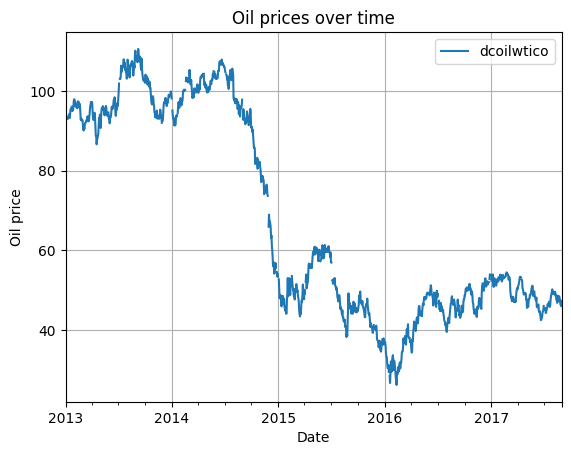

In [77]:
plt.figure(figsize=(10,5))
oil.plot(x='date', y='dcoilwtico')
plt.title('Oil prices over time')
plt.xlabel('Date')
plt.ylabel('Oil price')
plt.grid()
plt.show()

In [79]:
#missing values 
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [88]:
# aggregate sales to get daily sales
daily_sales = train.groupby('date')['sales'].sum().reset_index()
daily_sales['date'] = pd.to_datetime(daily_sales['date'])

sales_and_oil = pd.merge(daily_sales, oil, on='date')


In [90]:
sales_and_oil.head()

,date,sales,dcoilwtico
0,2013-01-01,2511.618999,NaN
1,2013-01-02,496092.417944,93.14
2,2013-01-03,361461.231124,92.97
3,2013-01-04,354459.677093,93.12
4,2013-01-07,336122.801066,93.20


Before plotting oil and sales data, let us first scale it.

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sales_and_oil[['sales_scaled', 'dcoilwtico_scaled']] = scaler.fit_transform(sales_and_oil[['sales', 'dcoilwtico']])

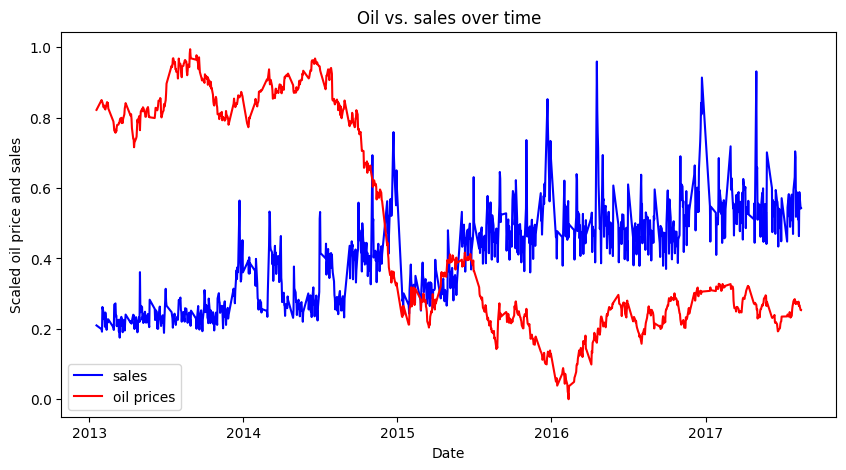

In [105]:
#plot sales and oil prices
plt.figure(figsize=(10,5))
plt.plot(sales_and_oil['date'], sales_and_oil['sales_scaled'], color='blue', label='sales')
plt.plot(sales_and_oil['date'], sales_and_oil['dcoilwtico_scaled'], color='red', label='oil prices')
plt.title('Oil vs. sales over time')
plt.xlabel('Date')
plt.ylabel('Scaled oil price and sales')
plt.legend()
plt.show()


Calculating moving averages and smoothing the data might provide us a better insight about the data. So, lets calculate moving averages for a window of 7 days.

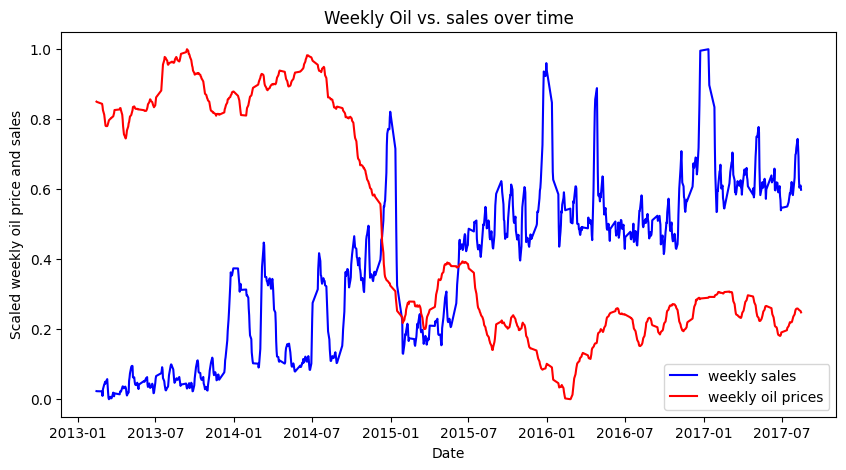

In [107]:
# moving averages and smooth oil and sales data
window = 7

sales_and_oil['sales_ma'] = sales_and_oil['sales'].rolling(window=window).mean()
sales_and_oil['dcoilwtico_ma'] = sales_and_oil['dcoilwtico'].rolling(window=window).mean()

scaler = MinMaxScaler()
sales_and_oil[['sales_ma_scaled', 'dcoilwtico_ma_scaled']] = scaler.fit_transform(sales_and_oil[['sales_ma', 'dcoilwtico_ma']])
sales_and_oil.dropna(inplace=True)

#plot smoothed and scaled sales and oil prices
plt.figure(figsize=(10,5))
plt.plot(sales_and_oil['date'], sales_and_oil['sales_ma_scaled'], color='blue', label='weekly sales')
plt.plot(sales_and_oil['date'], sales_and_oil['dcoilwtico_ma_scaled'], color='red', label='weekly oil prices')
plt.title('Weekly Oil vs. sales over time')
plt.xlabel('Date')
plt.ylabel('Scaled weekly oil price and sales')
plt.legend()
plt.show()
